Analysis of a dataset from a retail company based on video games. The intention is to help determine the sales strategy for the company in their upcoming Summer season. 

## Technical approach
This project involves applying Exploratory Data Analysis (EDA) techniques to clean and prepare a dataset for data visualization techniques through Python coding. The first section covers the data cleaning process. The second section addresses various statistical questions. The third section presents a deeper statistical question. Finally, the fourth section provides the rationale behind the data visualization choices and customizations.

### 1. EDA - Data cleaning

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore") 

In [2]:
df = pd.read_csv('vgsales.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [4]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [5]:
df.describe(include = object)

,Name,Platform,Genre,Publisher,User_Score,Developer,Rating
count,16717,16719,16717,16665,10015,10096,9950
unique,11562,31,12,581,96,1696,8
top,Need for Speed: Most Wanted,PS2,Action,Electronic Arts,tbd,Ubisoft,E
freq,12,2161,3370,1356,2425,204,3991


### 1.1 Data Types
The raw dataset consists of **16 columns** and **16,719 observations**. According to the data dictionary, at least one column (`User_Score`) is incorrectly identified as an object (string) type instead of a numeric type. Correctly identifying and cleaning this column is essential to perform mathematical calculations and create accurate visualizations.

In [6]:
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

The string 'tbd' was found.

In [7]:
regex = r'(?:tbd)'
df['User_Score'] = df['User_Score'].str.replace(regex, '', regex = True)
df['User_Score'] = pd.to_numeric(df['User_Score'], errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


After cleaning the strings, the column `User_Score` decreased from 10,015 observations to 7,590 (-24%.1).

### 1.2 Duplicates
Removing duplicates is an essential step in data cleaning because it avoids redundancy and ensures the dataset’s quality.

In [8]:
duplicates = df[df.duplicated()]
print("Number of duplicates:", duplicates.shape)

Number of duplicates: (0, 16)


No duplicates rows were found in the datraset.

### 1.3 Missing values
The investigation of missing values in a dataset is an essential step in assessing data quality. Proper handling of missing values can involve imputation, where techniques are used to estimate values for the missing data, or even dropping rows or columns when the missing data rate is too high. Dropping is also preferred when imputation could introduce bias or compromise the reliability of the analysis, as it may result in values that do not reflect the real scenario.

Name                0.01
Platform            0.00
Year_of_Release     1.61
Genre               0.01
Publisher           0.32
NA_Sales            0.00
EU_Sales            0.00
JP_Sales            0.00
Other_Sales         0.00
Global_Sales        0.00
Critic_Score       51.33
Critic_Count       51.33
User_Score         54.60
User_Count         54.60
Developer          39.61
Rating             40.49
dtype: float64


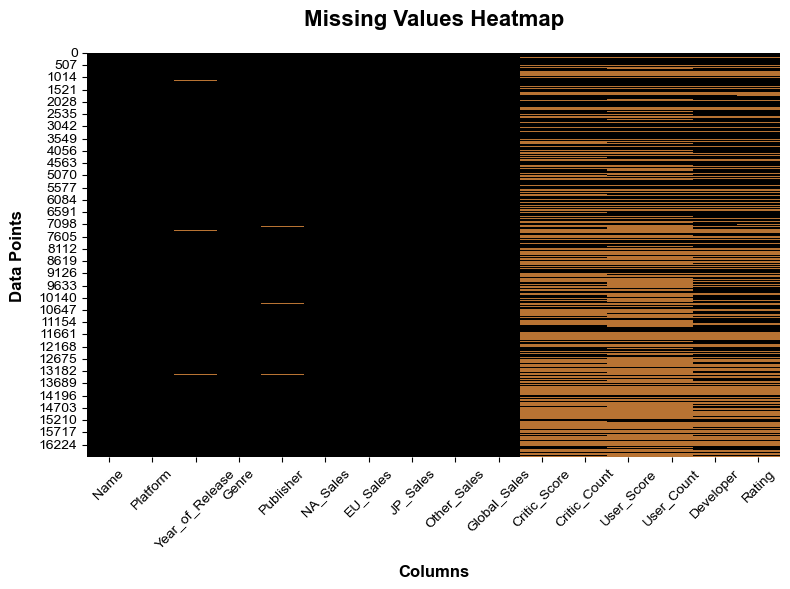

In [9]:
# Rates of missing values
print(round(df.isnull().sum()/len(df)*100, 2))
missing_values = df.isnull()

# Set font family globally
plt.rcParams['font.family'] = 'Arial'

# Plotting missing values heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(missing_values, cmap = ['#000000', '#b87333'], cbar = False) # black and pure copper colors
plt.title('Missing Values Heatmap', fontsize = 16, pad = 20, fontweight = 'bold')
plt.xlabel('Columns', fontsize = 12, labelpad = 10, fontweight = 'bold')
plt.ylabel('Data Points', fontsize = 12, labelpad = 10, fontweight = 'bold')
plt.xticks(rotation = 45) 
plt.tight_layout() #prevent clipping
plt.show()

Out of the sixteen columns in the dataset, ten exhibited missing values. However, columns such as `Critic_Score`, `Critic_Count`, `User_Score`, `User_Count`, `Developer` and `Rating` had particularly high rates of missing data, with some of them missing more than half of their values. In this context, applying an imputation technique to fill in these missing values may introduce inaccurate assumptions or bias into the dataset.

For instance, when considering columns like `Critic_Score` and `User_Score`, imputation methods, such as machine learning models, would estimate values based on available data for specific games. However, these imputed values may not accurately reflect the true ratings for those games, as they might be influenced by patterns or correlations that do not genuinely represent the missing information. For this reason, the missing values will be dropped.

In [10]:
df.dropna(axis = 0, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   float64
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(10), object(6)
memory usage: 906.4+ KB


After the missing values being handled, the dataset decreased from 16,719 observations to 6,825 (-59,2%).

### 2.1 Top 5 publishers by global sales

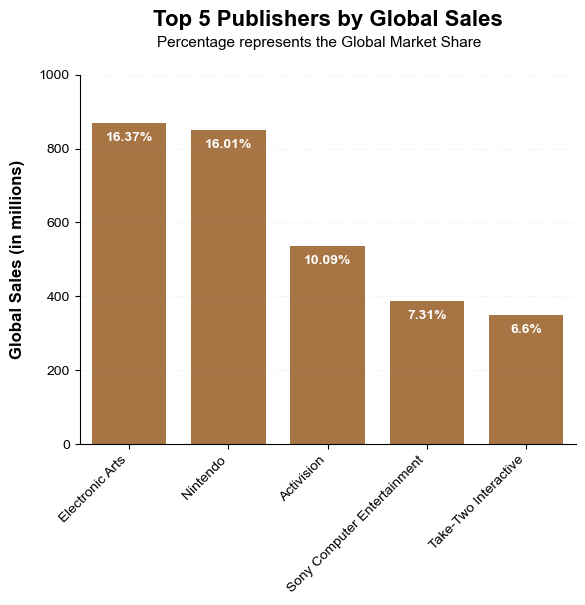

<Figure size 1200x600 with 0 Axes>

In [11]:
# Groupping by Publisher and adding the Market Share
test = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending = False).reset_index()
test['GMS'] = (test['Global_Sales'] / test['Global_Sales'].sum())*100
test['GMS'] = test['GMS'].round(2)
#test

# Plot
ax = sns.barplot(data = test.head(), x = 'Publisher', y = 'Global_Sales', color = '#b87333', width = 0.75)

# Texts
#plt.xlabel('Publisher', fontsize = 12, labelpad = 10, fontweight = 'bold')
plt.ylabel('Global Sales (in millions)', fontsize = 12, labelpad = 10, fontweight = 'bold')
plt.title('Top 5 Publishers by Global Sales', fontsize = 16, pad = 35, fontweight = 'bold')
plt.suptitle('Percentage represents the Global Market Share', y = 0.96, fontsize = 11)
plt.xticks(rotation = 45, ha = 'right')

# Labels
ax.bar_label(ax.containers[0], labels = [f'{ms}%' for ms in test.head()['GMS']], padding = -15, fontsize = 10, fontweight = 'bold', color = 'white')
ax.set_xlabel('') #Intentionally not showing the 'Publisher' x label

# Further Customisations
plt.ylim(0, 1000) # y axis limit
ax.spines[['top', 'right']].set_visible(False) #Removing spines (top and right chart boundaries)
ax.grid(axis = 'y', linestyle = '-.', alpha = 0.1)

plt.figure(figsize = (12, 6))
plt.tight_layout() #prevent clipping
plt.show();

The top publishers by global sales are led by EA and Nintendo, which together hold almost a third of the global market. Activision holds a significant portion of the market (10.09%), but still remains at a considerable distance from Nintendo (more than 300 million).

The data was grouped by `Publisher` and then summed by `Global_Sales`. Market share was a better solution for visualization, as plotting the sales values on top of each bar would have added visual noise to the plot. Furthermore, this choice of bringing the market share enhances the insights.

### 2.2 Correlation between 'na_sales' and 'eu_sales'
Is there a correlation between the “na_sales” and “eu_sales” for the years 2010-2014? 

In [12]:
# Filter
na_eu_corr = df[['NA_Sales', 'EU_Sales']].where(df['Year_of_Release'].between(2010, 2014)).dropna()
#na_eu_corr.head()

# Calculate Pearson correlation coefficient
correlation = na_eu_corr['NA_Sales'].corr(na_eu_corr['EU_Sales'])
correlation = f"Correlation: {correlation:.2f}"  #2 decimal places
correlation

'Correlation: 0.78'

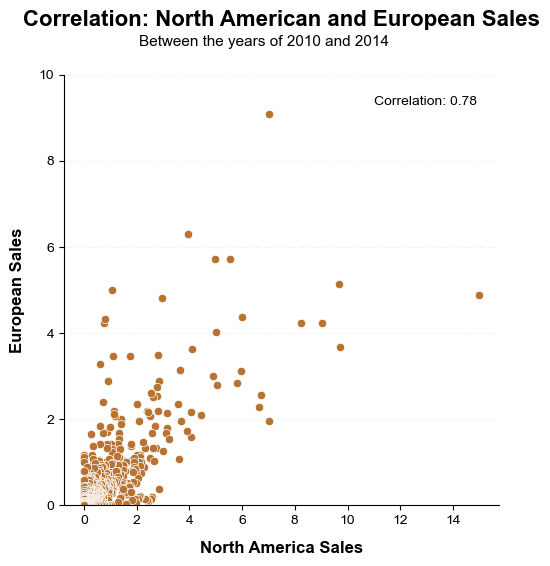

<Figure size 1000x600 with 0 Axes>

In [13]:
# Plot
g = sns.relplot(x = 'NA_Sales', y = 'EU_Sales', color = '#b87333', data = na_eu_corr);

# Texts
plt.title('Correlation: North American and European Sales', fontsize = 16, pad = 35, fontweight = 'bold')
plt.suptitle('Between the years of 2010 and 2014', y = 1.05, fontsize = 11)
plt.xlabel('North America Sales', fontsize = 12, labelpad = 10, fontweight = 'bold')
plt.ylabel('European Sales', fontsize = 12, labelpad = 10, fontweight = 'bold')

# correlation as a legend
g.ax.text(
    0.95, 0.95, correlation,  # Coordinates for the position
    transform = g.ax.transAxes,  # Use axes coordinates for positioning
    fontsize = 10,
    ha = 'right', va = 'top',  # Align text to right-top
)

# Further customisations
plt.ylim(0, 10) # y axis limit
ax = g.ax #acessing the relplot axes to be able to plot the grid lines
ax.grid(axis = 'y', linestyle = '-.', alpha = 0.1)

plt.figure(figsize = (10, 6))
plt.tight_layout() #prevent clipping
plt.show()

The visualisation suggests a positive relationship between the two markets, and the correlation result reaffirms this hypothesis. Despite the data points being highly concentrated in the bottom-left corner, the relationship indicates that both markets align with gaming trends.

To achieve the results and gain a better understanding, the dataset was firstly subset as requested, after which the correlation was calculated and later used in the visualisation.

### 2.3 The 3 most popular games genres
What is the distribution of the 3 most popular (by user_score) game genres?  

As highlighted in the missing values section, the `User_Score` column is one with the most missing values. Utilizing imputation techniques in this case would assume inaccurate data and could alter the distribution. Additionally, the approach to solving this issue is by grouping by `Genre` and calculating the mean for `User_Score`. Imputing missing values as '0' would also affect the results.

In [14]:
top3_genres = df.groupby('Genre')['User_Score'].mean().sort_values(ascending = False).head(3).reset_index() #reset_index to keep as Pandas DataFrame
top3_genres

,Genre,User_Score
0,Role-Playing,7.618539
1,Platform,7.377171
2,Strategy,7.352809


In [15]:
df_top3_genres = df[df['Genre'].isin(top3_genres['Genre'])]
#df_top3_genres

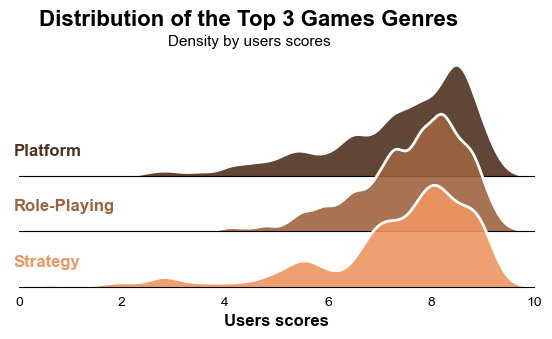

In [16]:
# Set up the FacetGrid and colors
pal = sns.color_palette("copper", n_colors = 3)  #copper palette with 3 color variations
g = sns.FacetGrid(df_top3_genres, row = "Genre", hue = "Genre", height = 1.2, aspect = 5, palette = pal)

# Generating KDE plot and white line in the overlapping
g.map(sns.kdeplot, "User_Score", fill = True, alpha = 0.9, lw = 0, bw_adjust = .5, clip_on = False)
g.map(sns.kdeplot, "User_Score", clip_on = False, color = "w", lw = 2, bw_adjust = .5)

# Setting each plot with transparent background
for ax in g.axes.flat:
    ax.patch.set_alpha(0)  

# Label function - position labels to the left of the plots
def label(x, color, label):
    ax = plt.gca()
    ax.text(-0.01, 0.2, label, fontweight = "bold", fontsize = 12, color = color, ha = "left", va = "center", transform = ax.transAxes)
    
g.map(label, "Genre")

# Overlapping the plots
g.fig.subplots_adjust(hspace = -0.55) 
g.set(xlim = (0, 10))  #x-axis limit

# Clean up axes
for ax in g.axes.flat:
    ax.set_ylabel('')
    ax.tick_params(left = False, bottom = False)
    sns.despine(ax = ax, left = True, bottom = True)

# Texts
g.fig.subplots_adjust(top = 0.8)  #Added top padding to have more space for the titles
g.fig.suptitle('Distribution of the Top 3 Games Genres', y = 0.92, fontsize = 16, fontweight = 'bold')  # Using fig.suptitle
g.fig.text(0.5, 0.82, 'Density by users scores', ha = 'center', fontsize = 11)  #Secondary title and determining position
g.set_xlabels('Users scores', fontsize = 12, fontweight = 'bold')

# Remove all y-axis elements
g.set(yticks = [], ylabel = "")
g.despine(left = True)
g.set_titles("")  #removinf all titles
plt.show()

The comparison shows slightly different peaks for the top three game genres, with Platform having the peak closest to 10. However, the Platform genre also has the most spread-out data in volume, which visually means that users more frequently rate this genre between 4 and 7 compared to the others. Role-Playing and Strategy are the genres that show more concentration of data points in the range of 6 to 9, indicating that users more frequently rate these genres within this range.

The data was grouped by `Genre`, and the means of `User_Score` gor each genre were calculated. The reset_index function was used to keep the result as a pandas DataFrame, allowing for an easy way to produce the visualization.

### 2.4 Older versus new games
Do older games (2005 and earlier) have a higher MEDIAN “eu_sales” than newer games (after 2005)?

Older than 2005 median European sales: 0.06
Newer than 2005 median European sales: 0.06


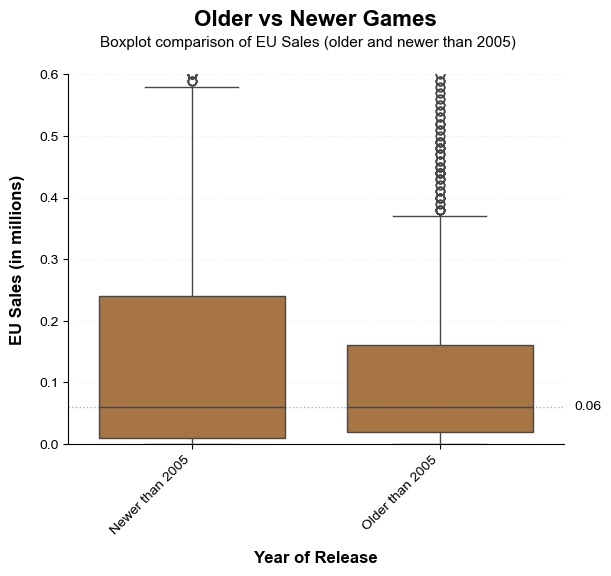

<Figure size 1000x600 with 0 Axes>

In [17]:
# Labelling older and newer games
df['years_label'] = df['Year_of_Release'].apply(lambda x: 'Older than 2005' if x <= 2005 else 'Newer than 2005') #adding a column labeling the two categories

# Medians
print(f'Older than 2005 median European sales: {df.loc[df["Year_of_Release"] <= 2005, "EU_Sales"].median()}')
print(f'Newer than 2005 median European sales: {df.loc[df['Year_of_Release'] > 2005, 'EU_Sales'].median()}')

# Boxplot
ax = sns.boxplot(x = 'years_label', y = 'EU_Sales', data = df, color = '#b87333', width=0.75)

# Texts
plt.xlabel('Year of Release', fontsize = 12, labelpad = 10, fontweight = 'bold')
plt.ylabel('EU Sales (in millions)', fontsize = 12, labelpad = 10, fontweight = 'bold')
plt.title('Older vs Newer Games', fontsize = 16, pad = 35, fontweight = 'bold')
plt.suptitle('Boxplot comparison of EU Sales (older and newer than 2005)', y = 0.96, fontsize = 11)
plt.xticks(rotation = 45, ha = 'right')

# Reference line at y=0.06
ax.axhline(y = 0.06, color = 'grey', linestyle = ':', linewidth = 1, alpha = 0.6)

# Label for the line
ax.text(1.02, 0.06, '0.06', 
        transform = ax.get_yaxis_transform(),  # relative y-axis coordinates
        va = 'center', ha = 'left',
        color = 'black', fontsize = 10)

# Further customisations
plt.ylim(0, 0.6) #limiting 'y' axis to cut the outliers
ax.spines[['top', 'right']].set_visible(False) #Removing spines (top and right chart boundaries)
ax.grid(axis = 'y', linestyle = '-.', alpha = 0.1)

plt.figure(figsize=(10, 6))
plt.tight_layout() #prevent clipping
plt.show()

The boxplot represents the data in four different quantiles, with the area within the box divided by a line. This line represents the median, and in the dataset, the median for both older and newer games is exactly the same.

The rationale was to label each observation according to the year of production and then calculate the medians for the two classes. Although calculating the median wasn't necessary, as the boxplot visualization already displays this information, it allowed for the visualization of the number '0.06' and the creation of the line crossing the chart.

### 2.5 Top 3 developers 
What are the 3 most common “developer” in the dataset?  

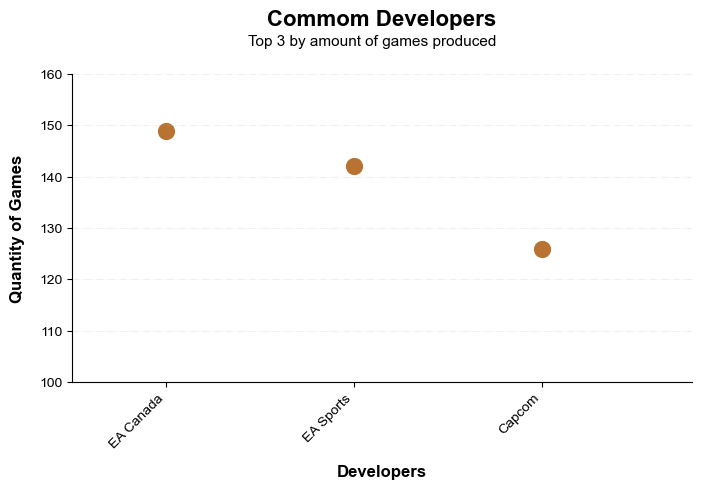

In [18]:
# Filtering
developers_top = pd.DataFrame(df['Developer'].value_counts().head(3))
developers_top = developers_top.reset_index() #reset index to have developers as a column
developers_top.columns = ['Developer', 'Quantity']

# Plot (dots instead of bars)
fig, ax = plt.subplots(figsize = (8, 4))
x_positions = range(len(developers_top['Developer'])) #defining positions to have numerical positions (0, 1, 2 ... and then have closer dot points)
ax.scatter(x = developers_top['Developer'], y = developers_top['Quantity'], color = '#b87333', s = 130)  # s controls the dot size

# Texts
plt.xlabel('Developers', fontsize = 12, labelpad = 10, fontweight = 'bold')
plt.xticks(rotation = 45)
plt.ylabel('Quantity of Games', fontsize = 12, labelpad = 10, fontweight = 'bold')
plt.title('Commom Developers', fontsize = 16, pad = 35, fontweight = 'bold')
plt.suptitle('Top 3 by amount of games produced', y = 0.98, fontsize = 11)
plt.xticks(rotation = 45, ha = 'right')

# Further Customisations
plt.ylim(100, 160) # y axis limit
ax.set_xlim(-0.5, 2.8)
ax.spines[['top', 'right']].set_visible(False) #Removing spines (top and right chart boundaries)
ax.grid(axis = 'y', linestyle = '-.', alpha = 0.2) #grid lines

# Show the plot
#plt.tight_layout() #prevent clipping
plt.show()

The plot shows that the developers do not have a significant difference between them.

The data was filtered by developers, and the count reflects how many times each developer appears in the dataset.

### 3. Further Analysis 
Do certain genres perform better on specific platforms? For instance, action games may be more successful on PlayStation, while simulation games could be more popular on PC. Analyzing this could guide future game development.

Considering the four most common games genres, which platforms are the most utilized for each of them?

In [19]:
pivot_df = df.pivot_table(index = 'Genre', columns = 'Platform', values = 'User_Count', aggfunc = 'sum')
pivot_df = pivot_df.assign(total_players = pivot_df.sum(axis = 1))
pivot_df = pivot_df.sort_values('total_players', ascending = False)
pivot_df.head()

Platform,3DS,DC,DS,GBA,GC,PC,PS,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne,total_players
Genre,,,,,,,,,,,,,,,,,,
Shooter,249.0,12.0,736.0,129.0,1730.0,151582.0,270.0,4712.0,39104.0,37404.0,1163.0,2055.0,2600.0,2360.0,71483.0,5007.0,18432.0,339028.0
Action,5152.0,NaN,1826.0,1194.0,3925.0,89287.0,2822.0,20037.0,73581.0,47289.0,3412.0,3510.0,7371.0,6915.0,48054.0,2595.0,12619.0,329589.0
Role-Playing,4082.0,206.0,4031.0,1567.0,1319.0,116202.0,4659.0,9064.0,25068.0,21719.0,3318.0,3723.0,2167.0,1756.0,28134.0,1326.0,7480.0,235821.0
Strategy,212.0,NaN,606.0,485.0,320.0,51819.0,99.0,569.0,596.0,261.0,273.0,NaN,375.0,664.0,1671.0,180.0,103.0,58233.0
Platform,2598.0,236.0,1744.0,1054.0,1511.0,4077.0,1357.0,3192.0,8438.0,3634.0,701.0,1029.0,7079.0,6334.0,2183.0,427.0,586.0,46180.0


In [20]:
# Get the platform name with the highest value for each genre
highest_platforms = pivot_df.drop(columns = 'total_players').idxmax(axis = 1) #getting the only the column name/index
highest_values = pivot_df.drop(columns = 'total_players').max(axis = 1) #getting the only the value

result = pd.DataFrame({
    'popular_platform': highest_platforms,
    'platform_players': highest_values,
    'genre_total_players': pivot_df['total_players']
})

result['fraction'] = (result['platform_players'] / result['genre_total_players']) * 100
result['fraction'] = result['fraction'].apply(lambda x: f'{x:.2f}%') #two decimals + % symbols
result = result.head(4)
result

,popular_platform,platform_players,genre_total_players,fraction
Genre,,,,
Shooter,PC,151582.0,339028.0,44.71%
Action,PC,89287.0,329589.0,27.09%
Role-Playing,PC,116202.0,235821.0,49.28%
Strategy,PC,51819.0,58233.0,88.99%


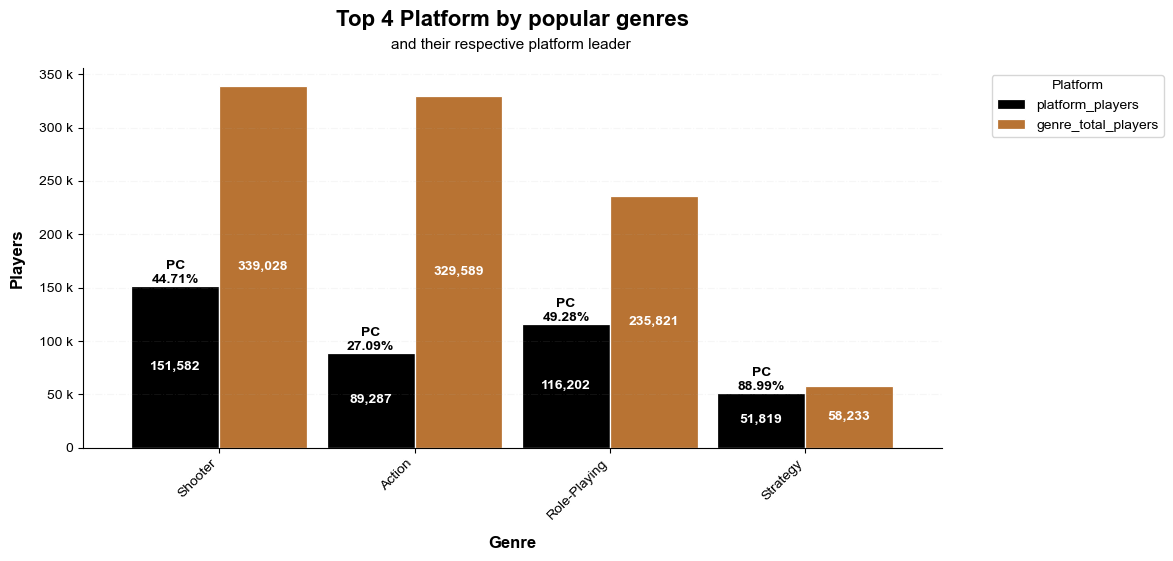

<Figure size 1920x1440 with 0 Axes>

In [21]:
import matplotlib.ticker as ticker

# Create plot
ax = result.plot(kind='bar',
                         #stacked=True,
                         figsize=(12, 6),  # (width, height)
                         color=['#000000', '#b87333'],  # black and pure copper colors
                         width=0.9, 
                         edgecolor='white',  # White bar edges
                         linewidth=0.9
                        )

# labels & titles
plt.title('Top 4 Platform by popular genres', fontsize = 16, pad = 30, fontweight = 'bold')
plt.suptitle('and their respective platform leader', y = 0.88, x = 0.54, fontsize = 11, ha = 'right')
plt.xlabel('Genre', fontsize = 12, labelpad = 10, fontweight = 'bold')
plt.ylabel('Players', fontsize = 12, labelpad = 10, fontweight = 'bold')
plt.xticks(rotation = 45, ha = 'right') 

# Add value labels inside the bars
for container in ax.containers:
    ax.bar_label(
        container,
        label_type='center',  # Labels inside the bars
        fmt='{:,.0f}',  #adding commas
        color='white',  # Label color
        fontsize=10,
        fontweight='bold'
    )

# Add platform labels inside the bars
for bar, (genre, row) in zip(ax.patches, result.iterrows()): #patches are list of bars created by the plot
    platform_label = row['popular_platform']
    fraction_label = row['fraction']
    
    # Calculate the center of the bar for text placement
    bar_center_x = bar.get_x() + bar.get_width() / 2
    bar_height = bar.get_height()
    
    # Place the platform label at the center of the bar
    ax.text(
        bar_center_x,  # Horizontal position
        bar.get_y() + bar_height,  # Vertical position (center of the bar)
        str(f'\n\n\n\n{platform_label}\n{fraction_label}'), #\n\n two line breaks
        ha='center', va='bottom',  # Text alignment
        fontsize=10,
        color='black',
        fontweight='bold'
    )

# Legend customization
plt.legend(
    title='Platform', 
    bbox_to_anchor=(1.05, 1),  # Move legend outside
    loc='upper left',
    frameon=True  # Show legend border
)

ax.spines[['top', 'right']].set_visible(False) #Removing spines (top and right chart boundaries)

# Add grid (optional)
ax.grid(axis='y', linestyle='-.', alpha=0.1)

# Adjust layout to prevent clipping
plt.tight_layout()
ax.yaxis.set_major_formatter(ticker.EngFormatter()) #formatting y axis (divided by 100 + string 'k')
plt.figure(dpi = 300)
plt.show();

The plot shows that the Shooter and Action genres lead the market with a significant number of players. However, PC plays an important role in how players access these games. Among the four genres, PC is the leading platform for all of them, with a significant share in the Strategy genre as well. PC's dominance across the top gaming genres raises an important question: What makes it the preferred platform for so many players? Could customizations be one of the factors? What about the data on its presence in e-sports? All of these are questions arise from analyzing the output above.Further research and development can be done from this perspective.

The general rationale for this graph was to first aggregate the data using a pivot table, with `Genre` as the index, the different platforms as columns, and the sum of `User_Count`. Later, the most-played platform and its values were obtained using the 'idxmax' and 'max' functions. After renaming the columns for better visualisation, the `fraction` column was added for each genre.

### 4.1 Explanation for data engineering and coding
The explanations were given at the end of each exercise.

### 4.2 and 4.3 Visualisations choices

Some general choices were made at the beginning (during the missing values heatmap) to serve as the base style for all the visualizations. The first was setting the font to Arial, which provides a formal aspect to the report (as it is commonly used in many journals around the world). The second was selecting the color scheme. The 'copper' palette (black and orange) was chosen because it allows better visual anchors.

The rationale was to create a report with visualisations that communicate with each other, so all the sizes are proportionally the same. Titles used the same font size and were in bold. Subtitles were brought to give extra information for the reader. Labels were set to size 12, in bold, with a padding (distance) of 10. Gridlines were added and the axis ticks were, in some cases, rotated to 45 degrees to improve readability.

For exercise 2.1, a bar chart was chosen because it can display more than one piece of information at once. Further customizations involved removing the top and right spines. The 'Publisher' label on the x-axis was intentionally removed for a cleaner visualization. And as mentioned earlier, labels for the millions were not plotted because they would add noise to the chart, so instead, market share was used as an alternative solution that added more insights opportunities.

For exercise 2.2, a scatterplot was chosen because it is one of the best options to represent relationships between numerical data. Further customisation involved limiting the y-axis to allow for better visualization.

For exercise 2.3, the choice was to use a plot that overlaps itself (desinty plot), creating an interesting visualisation. Customizations involved adjusting the color transparency, background transparency, customizing the position of the labels, and intentionally not displaying the x-axis and y-axis.

The choice for Exercise 2.4 was a boxplot, as it "separates" the data and shows the median. The visualisation required a y-axis limit because the median value was too small. Additionally, a line was plotted to clearly indicate where the median was positioned (and they were the same).

For Exercise 2.4, the choice was to do not repeat a bar chart. So dot were used to represent the data points.

Furthermore, the 'tight_layout' function was used multiple times to avoid clipping.